# Introducing Image Processing and scikit-image
>  Jump into digital image structures and learn to process them! Extract data, transform and analyze images using NumPy and Scikit-image. With just a few lines of code, you will convert RGB images to grayscale, get data from them, obtain histograms containing very useful information, and separate objects from the background!

- toc: true 
- badges: true
- comments: true
- author: Lucas Nunes
- categories: [Datacamp]
- image: images/datacamp/___

> Note: This is a summary of the course's chapter 1 exercises "Image Processing in Python" at datacamp. <br>[Github repo](https://github.com/lnunesAI/Datacamp/) / [Course link](https://www.datacamp.com/tracks/machine-learning-scientist-with-python)

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#plt.rcParams['figure.figsize'] = (8, 8)

## Make images come alive with scikit-image

### Is this gray or full of color?

<div class=""><p>Whats the main difference between the images shown below?</p>
<p></p><center>
    <img src="https://assets.datacamp.com/production/repositories/4470/datasets/8c9d750b28a2b9614d48da2fd0116643fd4ddf19/coffeandcoins.png" width="70%" alt="Image of coffee next to coins image">
</center><p></p>
<p>These images have been preloaded as <code>coffee_image</code> and <code>coins_image</code> from the scikit-image <code>data</code> module using:</p>
<pre><code>coffee_image = data.coffee()
coins_image = data.coins()
</code></pre>
<p>Choose the right answer that best describes the main difference related to color and dimensional structure.</p>
<p>In the console, use the function <code>shape()</code> from NumPy, to obtain the image shape (Height, Width, Dimensions) and find out.
NumPy is already imported as <code>np</code>.</p></div>

In [2]:
from skimage import data
coffee_image = data.coffee()
coins_image = data.coins()

In [5]:
coffee_image.shape, coins_image.shape

((400, 600, 3), (303, 384))

<pre>
Possible Answers

Both have 3 channels for RGB-3 color representation.

coffee_image has a shape of (303, 384), grayscale. And coins_image (400, 600, 3), RGB-3.

<b>coins_image has a shape of (303, 384), grayscale. And coffee_image (400, 600, 3), RGB-3.</b>

Both are grayscale, with single color dimension.
</pre>

**The coffee image is RGB-3 colored, that's why it has a 3 at the end, when displaying the shape (H, W, D) of it. While the coins image is grayscale and has a single color channel.**

### RGB to grayscale

<div class=""><p>In this exercise you will load an image from scikit-image module <code>data</code> and make it grayscale, then compare both of them in the output.</p>
<p>We have preloaded a function <code>show_image(image, title='Image')</code> that displays the image using Matplotlib. You can check more about its parameters using <code>?show_image()</code> or <code>help(show_image)</code> in the console.</p>
<p></p><center>
<img src="https://assets.datacamp.com/production/repositories/4470/datasets/2363d344b1d6dc36812842144efa657358175e7f/rocket.png" alt="Rocket" width="60%">
  <br>
</center><p></p></div>

In [6]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

Instructions
<ul>
<li>Import the <code>data</code> and <code>color</code> modules from Scikit image. The first module provides example images, and the second, color transformation functions.</li>
<li>Load the <code>rocket</code> image.</li>
<li>Convert the RGB-3 rocket image to grayscale.</li>
</ul>

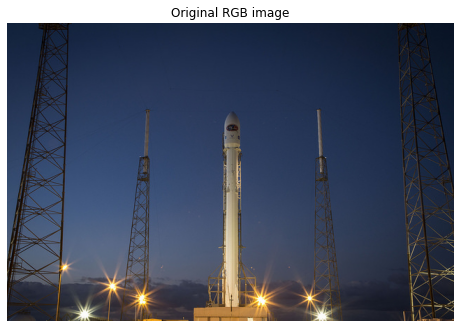

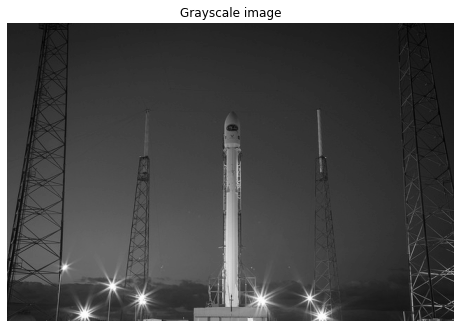

In [9]:
# Import the modules from skimage
from skimage import data, color

# Load the rocket image
rocket = data.rocket()

# Convert the image to grayscale
gray_scaled_rocket = color.rgb2gray(rocket)

# Show the original image
show_image(rocket, 'Original RGB image')

# Show the grayscale image
show_image(gray_scaled_rocket, 'Grayscale image')

**You converted an image to grayscale. For many applications of image processing, color information doesn't help us identify important edges or other features.**

## NumPy for images

### Flipping out

<div class=""><p>As a prank, someone has turned an image from a photo album of a trip to Seville upside-down and back-to-front! Now, we need to straighten the image, by flipping it.
</p><center>
<img src="https://assets.datacamp.com/production/repositories/4470/datasets/915096a8c431745a13227259e81103d90e038ec0/sevilleup(2).jpg" alt="City of Seville upside-down" width="70%">
  <br>
<em>Image loaded as <code>flipped_seville</code>.</em>
</center>
Using the NumPy methods learned in the course, flip the image horizontally and vertically. Then display the corrected image using the <code>show_image()</code> function.<p></p>
<p>NumPy is already imported as <code>np</code>.</p></div>

In [16]:
flipped_seville = plt.imread('sevilleup.jpg')

Instructions 1/3
<li>Flip the image vertically.</li>

In [18]:
# Flip the image vertically
seville_vertical_flip = np.flipud(flipped_seville)

Instructions 2/3
<li>Now, flip the vertically-flipped image horizontally.</li>

In [20]:
# Flip the image horizontally
seville_horizontal_flip = np.fliplr(seville_vertical_flip)

Instructions 3/3
<li>Show the, now fixed, image.</li>

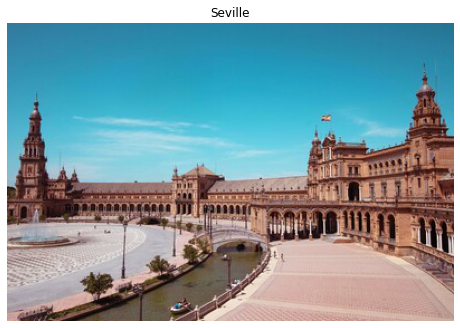

In [21]:
# Show the resulting image
show_image(seville_horizontal_flip, 'Seville')

### Histograms

<div class=""><p>In this exercise, you will analyze the amount of red in the image. To do this, the histogram of the red channel will be computed for the image shown below:</p>
<p></p><center>
<img src="https://assets.datacamp.com/production/repositories/4470/datasets/4ce875b1fceea382361da4fb4177ec2f16a8c016/4.1.01.jpg" alt="Woman smiling" width="25%">
  <br>
<em>Image loaded as <code>image</code>.</em>
</center><p></p>
<p>Extracting information from images is a fundamental part of image enhancement. This way you can balance the red and blue to make the image look colder or warmer.</p>
<p>You will use <code>hist()</code> to display the 256 different intensities of the red color. And <code>ravel()</code> to make these color values an array of one flat dimension.</p>
<p>Matplotlib is preloaded as <code>plt</code> and Numpy as <code>np</code>. </p>
<p>Remember that if we want to obtain the green color of an image we would do the following:</p>
<pre><code>green = image[:, :, 1]
</code></pre></div>

In [36]:
%%capture
!wget https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/18-image-processing-in-python/figures/red_hist.jpg
image = plt.imread('red_hist.jpg')

Instructions
<ul>
<li>Obtain the red channel using slicing.</li>
<li>Plot the histogram and bins in a range of 256. Don't forget <code>.ravel()</code> for the color channel.</li>
</ul>

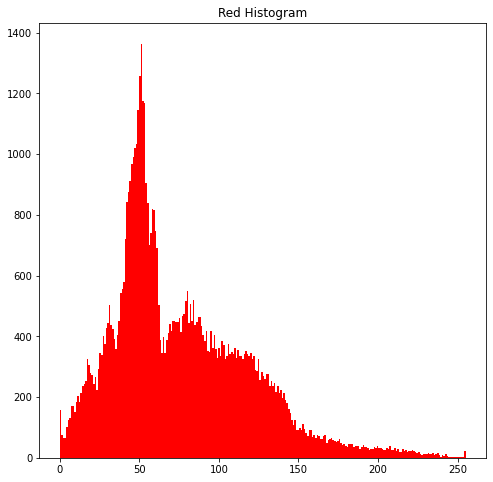

In [37]:
# Obtain the red channel
red_channel = image[:, :, 0]

# Plot the red histogram with bins in a range of 256
plt.hist(red_channel.ravel(), bins=256, color='red')

# Set title and show
plt.title('Red Histogram')
plt.show()

**With this histogram we see that the image is quite reddish, meaning it has a sensation of warmness. This is because it has a wide and large distribution of bright red pixels, from 0 to around 150.**

## Getting started with thresholding

### Apply global thresholding

<div class=""><p>In this exercise, you'll transform a photograph to binary so you can separate the foreground from the background.</p>
<p>To do so, you need to import the required modules, load the image, obtain the optimal thresh value using <code>threshold_otsu()</code> and apply it to the image.</p>
<p>You'll see the resulting binarized image when using the <code>show_image()</code> function, previously explained.</p>
<p></p><center>
<img src="https://assets.datacamp.com/production/repositories/4470/datasets/a3e2534b613b0083fd4b39aedbcf6dea8fd13947/bw.jpg" alt="Chess pieces" width="50%">
  <br>
<strong><em>Image loaded as <code>chess_pieces_image</code>.</em></strong>
</center><p></p>
<p>Remember we have to turn colored images to grayscale. For that we will use the <code>rgb2gray()</code> function learned in previous video. Which has already been imported for you.</p></div>

In [38]:
%%capture
!wget https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/18-image-processing-in-python/figures/chess_pieces_image.jpg
chess_pieces_image = plt.imread('chess_pieces_image.jpg')

Instructions
<ul>
<li>Import the otsu threshold function.</li>
<li>Turn the image to grayscale.</li>
<li>Obtain the optimal threshold value of the image.</li>
<li>Apply thresholding to the image.</li>
</ul>

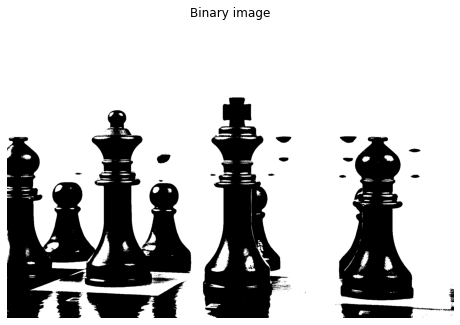

In [41]:
# Import the otsu threshold function
from skimage.filters  import threshold_otsu 

# Make the image grayscale using rgb2gray
chess_pieces_image_gray = color.rgb2gray(chess_pieces_image)

# Obtain the optimal threshold value with otsu
thresh = threshold_otsu(chess_pieces_image_gray)

# Apply thresholding to the image
binary = chess_pieces_image_gray > thresh

# Show the image
show_image(binary, 'Binary image')

**You just converted the image to binary and we can separate the foreground from the background.**

### When the background isn't that obvious

<div class=""><p>Sometimes, it isn't that obvious to identify the background. If the image background is relatively uniform, then you can use a global threshold value as we practiced before, using <code>threshold_otsu()</code>. However, if there's uneven background illumination, adaptive thresholding <code>threshold_local()</code> (a.k.a. local thresholding) may produce better results. </p>
<p>In this exercise, you will compare both types of thresholding methods (global and local), to find the optimal way to obtain the binary image we need.</p>
<p></p><center>
<img src="https://assets.datacamp.com/production/repositories/4470/datasets/38d74b953a34e69f793c5a419fc7ba903a17063b/text_page_original.png" alt="Page with text">
  <br>
<strong><em>Image loaded as <code>page_image</code>.</em></strong>
</center><p></p></div>

In [43]:
%%capture
!wget https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/18-image-processing-in-python/figures/page_image.jpg
page_image = plt.imread('page_image.jpg')

Instructions 1/2
<p>Import the otsu threshold function, obtain the optimal global thresh value of the image, and apply global thresholding.</p>

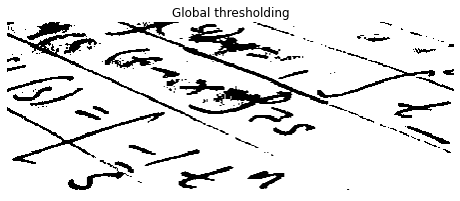

In [44]:
# Import the otsu threshold function
from skimage.filters import threshold_otsu

# Obtain the optimal otsu global thresh value
global_thresh = threshold_otsu(page_image)

# Obtain the binary image by applying global thresholding
binary_global = page_image > global_thresh

# Show the binary image obtained
show_image(binary_global, 'Global thresholding')

Instructions 2/2
<p>Import the local threshold function, set block size to 35, obtain the local thresh value, and apply local thresholding.</p>

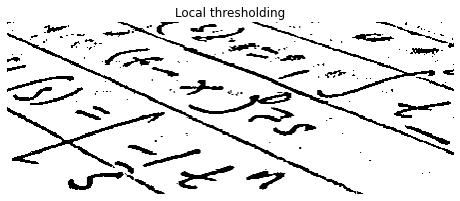

In [45]:
# Import the local threshold function
from skimage.filters import threshold_local

# Set the block size to 35
block_size = 35

# Obtain the optimal local thresholding
local_thresh = threshold_local(page_image, block_size, offset=10)

# Obtain the binary image by applying local thresholding
binary_local = page_image > local_thresh

# Show the binary image
show_image(binary_local, 'Local thresholding')

**Now you know that you should use local thresholding instead of global if the image has a wide variation of background intensity.**

### Trying other methods

<div class=""><p>As we saw in the video, not being sure about what thresholding method to use isn't a problem. In fact, scikit-image provides us with a function to check multiple methods and see for ourselves what the best option is. It returns a figure comparing the outputs of different <strong>global</strong> thresholding methods.</p>
<p></p><center>
<img src="https://assets.datacamp.com/production/repositories/4470/datasets/1683f923022eadec156f155e80782274b95078ad/fruits-2.jpg" alt="Forest fruits" width="50%">
  <br>
<em>Image loaded as <code>fruits_image</code>.</em>
</center><p></p>
<p>You will apply this function to this image, <code>matplotlib.pyplot</code> has been loaded as <code>plt</code>. Remember that you can use <code>try_all_threshold()</code> to try multiple global algorithms.</p></div>

In [47]:
%%capture
!wget https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/18-image-processing-in-python/figures/fruits_image.jpg
fruits_image = plt.imread('fruits_image.jpg')

Instructions
<ul>
<li>Import the try all function.</li>
<li>Import the rgb to gray convertor function.</li>
<li>Turn the fruits image to grayscale.</li>
<li>Use the try all method on the resulting grayscale image.</li>
</ul>

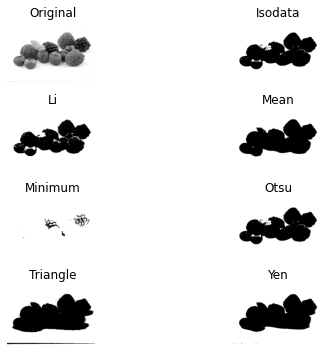

In [48]:
# Import the try all function
from skimage.filters import try_all_threshold

# Import the rgb to gray convertor function 
from skimage.color import rgb2gray

# Turn the fruits_image to grayscale
grayscale = rgb2gray(fruits_image)

# Use the try all method on the resulting grayscale image
fig, ax = try_all_threshold(grayscale, verbose=False)

# Show the resulting plots
plt.show()

**As you see, this image works good with some global thresholding methods (like the "Yen" and "Mean") and not so well in others, (like the "Minimum").**

### Apply thresholding

<div class=""><p>In this exercise, you will decide what type of thresholding is best used to binarize an image of knitting and craft tools. In doing so, you will be able to see the shapes of the objects, from paper hearts to scissors more clearly.</p>
<p></p><center>
<img src="https://assets.datacamp.com/production/repositories/4470/datasets/06b99c764a8d81145e33a9ac3ace8dade55fced2/shapes52.jpg" alt="Several tools for handcraft art" width="50%">
  <br>
<em>Image loaded as <code>tools_image</code>.</em>
</center><p></p>
<p>What type of thresholding would you use judging by the characteristics of the image? Is the background illumination and intensity even or uneven?</p></div>

In [53]:
%%capture
!wget https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/18-image-processing-in-python/figures/tools_image.jpg
tools_image = plt.imread('tools_image.jpg')

Instructions
<ul>
<li>Import the appropriate thresholding and <code>rgb2gray()</code> functions.</li>
<li>Turn the image to grayscale.</li>
<li>Obtain the optimal thresh.</li>
<li>Obtain the binary image by applying thresholding.</li>
</ul>

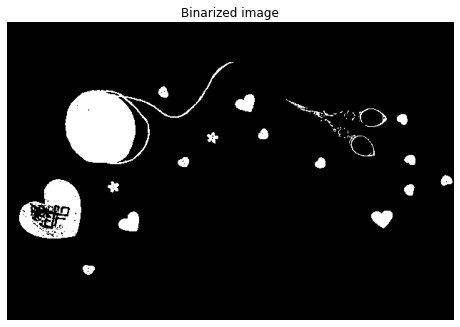

In [54]:
# Import threshold and gray convertor functions
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray

# Turn the image grayscale
gray_tools_image = rgb2gray(tools_image)

# Obtain the optimal thresh
thresh = threshold_otsu(gray_tools_image)

# Obtain the binary image by applying thresholding
binary_image = gray_tools_image > thresh

# Show the resulting binary image
show_image(binary_image, 'Binarized image')

**By using a global thresholding method, you obtained the precise binarized image. If you would have used local instead nothing would have been segmented.**